In [1]:
%matplotlib inline


Segmentation with Gaussian mixture models
=========================================

This example performs a Gaussian mixture model analysis of the image
histogram to find the right thresholds for separating foreground from
background.




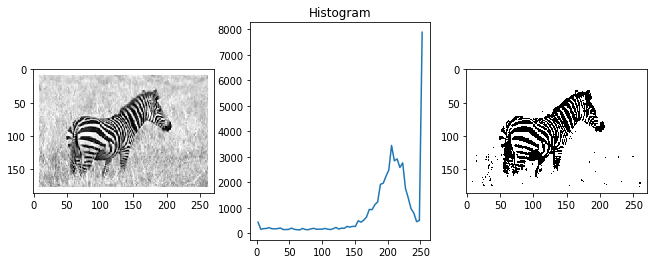

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

img = plt.imread("zebra.jpg")[:,:,0] # Taking a single channel

hist, bin_edges = np.histogram(img, bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

classif = GaussianMixture(n_components=2)
classif.fit(img.reshape((img.size, 1)))  # converting image to vector

threshold = np.mean(classif.means_)
binary_img = img > threshold


plt.figure(figsize=(11,4))

plt.subplot(131)
plt.imshow(img,'gray')
plt.subplot(132)
plt.title("Histogram")
plt.plot(bin_centers, hist)
plt.subplot(133)
plt.imshow(binary_img, cmap=plt.cm.gray, interpolation='nearest')
plt.show()